# Modulos


In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
# import the relevant modules

from sklearn.cluster import KMeans
from Bio import SeqIO
import copy
import math
import glob
import re

In [120]:
final_df = pd.read_csv("snv_data_10.csv")


In [125]:
final_df = pd.read_csv("snv_data_12.csv") 


In [30]:
final_df = pd.read_csv("snv_data_14.csv") 



In [121]:
final_df = final_df.fillna(0)

In [100]:
final_df.set_index('clade', inplace=True, drop = True)

In [140]:
final_df

,seqName,clade,C>T,A>G,G>A,G>C,T>C,C>A,G>T,A>T,...,TA>ins,AGATCT>ins,GAA>ins,ACT>ins,TTTC>ins,CCT>ins,CCC>ins,ATATT>ins,CCCCCC>ins,CAA>ins
1,Portugal/CV62/2020,20B,4.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Portugal/CV63/2020,20A,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Portugal/PT0001b/2020,20B,4.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Portugal/PT0003/2020,20A,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Portugal/PT0004/2020,20A,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20105,Portugal/PT20090/2021,21J (Delta),16.0,4.0,2.0,0.0,2.0,2.0,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20106,Portugal/PT20091/2021,21J (Delta),21.0,7.0,3.0,0.0,2.0,2.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20107,Portugal/PT20092/2021,21J (Delta),17.0,5.0,3.0,1.0,2.0,1.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20108,Portugal/PT20093/2021,21J (Delta),21.0,7.0,3.0,0.0,2.0,2.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
final_df.drop(final_df.filter(regex="Unnamed"), axis=1, inplace=True)

# PCA 


In [158]:
scaled_data = preprocessing.scale(final_df.iloc[:,3:]) # Fazer scaling dos dados para que fique centrado (0,0) 
# Como alternativa podemos usar o seguinte código para centrar os dados:
# StandardScaler().fit_transform(final_data_2)

pca = PCA(n_components=4) #n_componentes=X onde X é o numero de PC que quermos colocar no spree plot
pca.fit(scaled_data)  # calcular loading scores e variaçao para cada PCA
pca_data = pca.transform(scaled_data)
pca_data

array([[ 1.01923344e+00,  4.40621954e+00, -1.04356533e-01,
         2.94702376e-02],
       [ 8.42280555e-01,  4.97370874e+00, -1.34343531e-01,
         7.97887503e-02],
       [ 1.01923344e+00,  4.40621954e+00, -1.04356533e-01,
         2.94702376e-02],
       ...,
       [-2.36971129e+00, -6.93244729e-01, -1.26092884e-02,
         7.85566146e-04],
       [-2.04895267e+00, -1.74998656e+00, -3.57628488e-02,
        -3.03270721e-02],
       [-1.82032907e+00, -1.52587460e+00, -3.64874461e-02,
        -2.27829870e-02]])

In [159]:
pca.explained_variance_ratio_


array([0.06474979, 0.03710592, 0.01724344, 0.01723097])

In [160]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var


array([6.5, 3.7, 1.7, 1.7])

In [161]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
labels


['PC1', 'PC2', 'PC3', 'PC4']

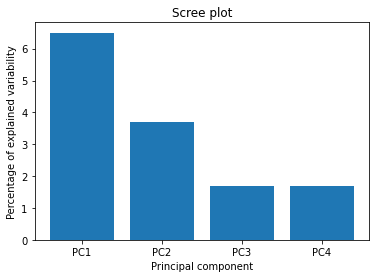

In [162]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained variability')
plt.xlabel('Principal component')
plt.title('Scree plot')
plt.show()  # grande parte da variabilidade está presente nos primeiros 9 componentes (cut-off point de 2). Estes 9 PC podem fazer uma boa representaçao geral dos dados

In [163]:

#Guardar as labels das amostras numa variavel unica de modo a colocar como indice na data frame dos PCs
sample_labels = final_df.index

pca_df = pd.DataFrame(pca_data, index=[sample_labels], columns=labels)
pca_df

,PC1,PC2,PC3,PC4
1,1.019233,4.406220,-0.104357,0.029470
2,0.842281,4.973709,-0.134344,0.079789
3,1.019233,4.406220,-0.104357,0.029470
4,0.842281,4.973709,-0.134344,0.079789
5,0.842281,4.973709,-0.134344,0.079789
...,...,...,...,...
20105,-1.918541,-0.631747,-0.004906,0.031639
20106,-1.969769,-1.698675,-0.038029,-0.031612
20107,-2.369711,-0.693245,-0.012609,0.000786
20108,-2.048953,-1.749987,-0.035763,-0.030327


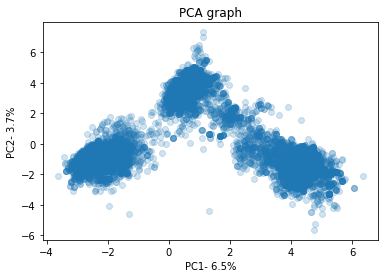

In [164]:


plt.scatter(pca_df.PC1, pca_df.PC2, alpha=0.2)
plt.title("PCA graph")
plt.xlabel('PC1- {0}%'.format(per_var[0]))
plt.ylabel('PC2- {0}%'.format(per_var[1]))
plt.show()

* KMeans clustering para identificar cluster (extrair os nossos clusters)


In [166]:
kmeans = KMeans(n_clusters=3, random_state=0) #como estamos a olhar para 2 PC, o n_clusters vai ser 2. O metodo 

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(pca_df)


In [ ]:
for clade in final_df.iloc[:,1]:
	print(final_df.index[clade])

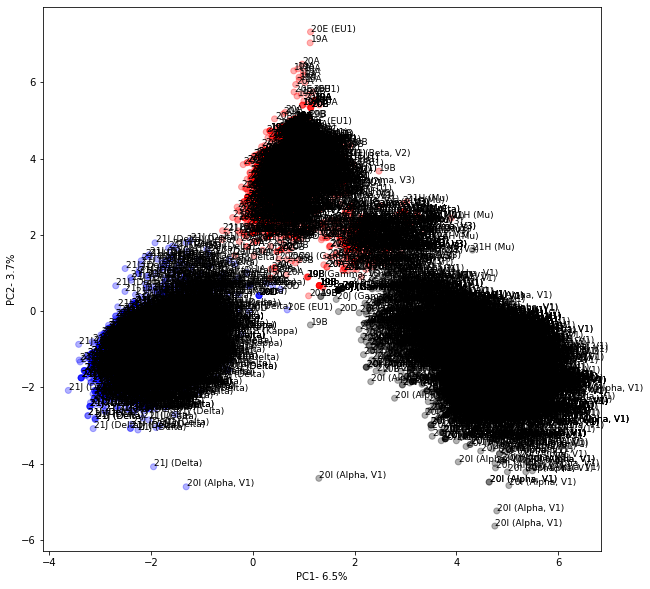

In [210]:
color_map = {0 : 'blue', 1 : 'red',2:'black',3:'green'} #alterar consoante o numero de componentes a analisar

label_color = [color_map[i] for i in X_clustered]
plt.figure(figsize = (10,10))
plt.scatter(pca_df.PC1,pca_df.PC2, c= label_color, alpha=0.3)

#Add labels

for index,clade in enumerate(final_df.iloc[:,1]):

	#i = range(1,len(final_df))

	labelpad = 0.01
	plt.text(pca_df.iloc[index,0]+labelpad, pca_df.iloc[index,1]+labelpad, clade, fontsize=9)

plt.xlabel('PC1- {0}%'.format(per_var[0]))
plt.ylabel('PC2- {0}%'.format(per_var[1]))
plt.show()